# Week 10, Part 2

### Topic
 1. ANOVA drug trials
 1. TO SLIDES FOR BONFFERONI CORRECTION
 1. Pairwise t-tests with Bonfferoni correction



In [22]:
# resize
require(repr)
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=300)

## 1. ANOVA drug trials

Suppose a drug company has 3 formulations of a drug for pain relief for migranes.  They randomly assign 1 of the 3 forumulations to 27 volunteers to take during their next migrane episode & rate their pain levels from 1-10.

Results look like:

In [23]:
drugA = c(4, 5, 4, 3, 2, 4, 3, 4, 4)
drugB = c(6, 8, 4, 5, 4, 6, 5, 8, 6)
drugC = c(6, 7, 6, 6, 7, 5, 6, 5, 5)

Let's first make boxplots to check out what these look like:

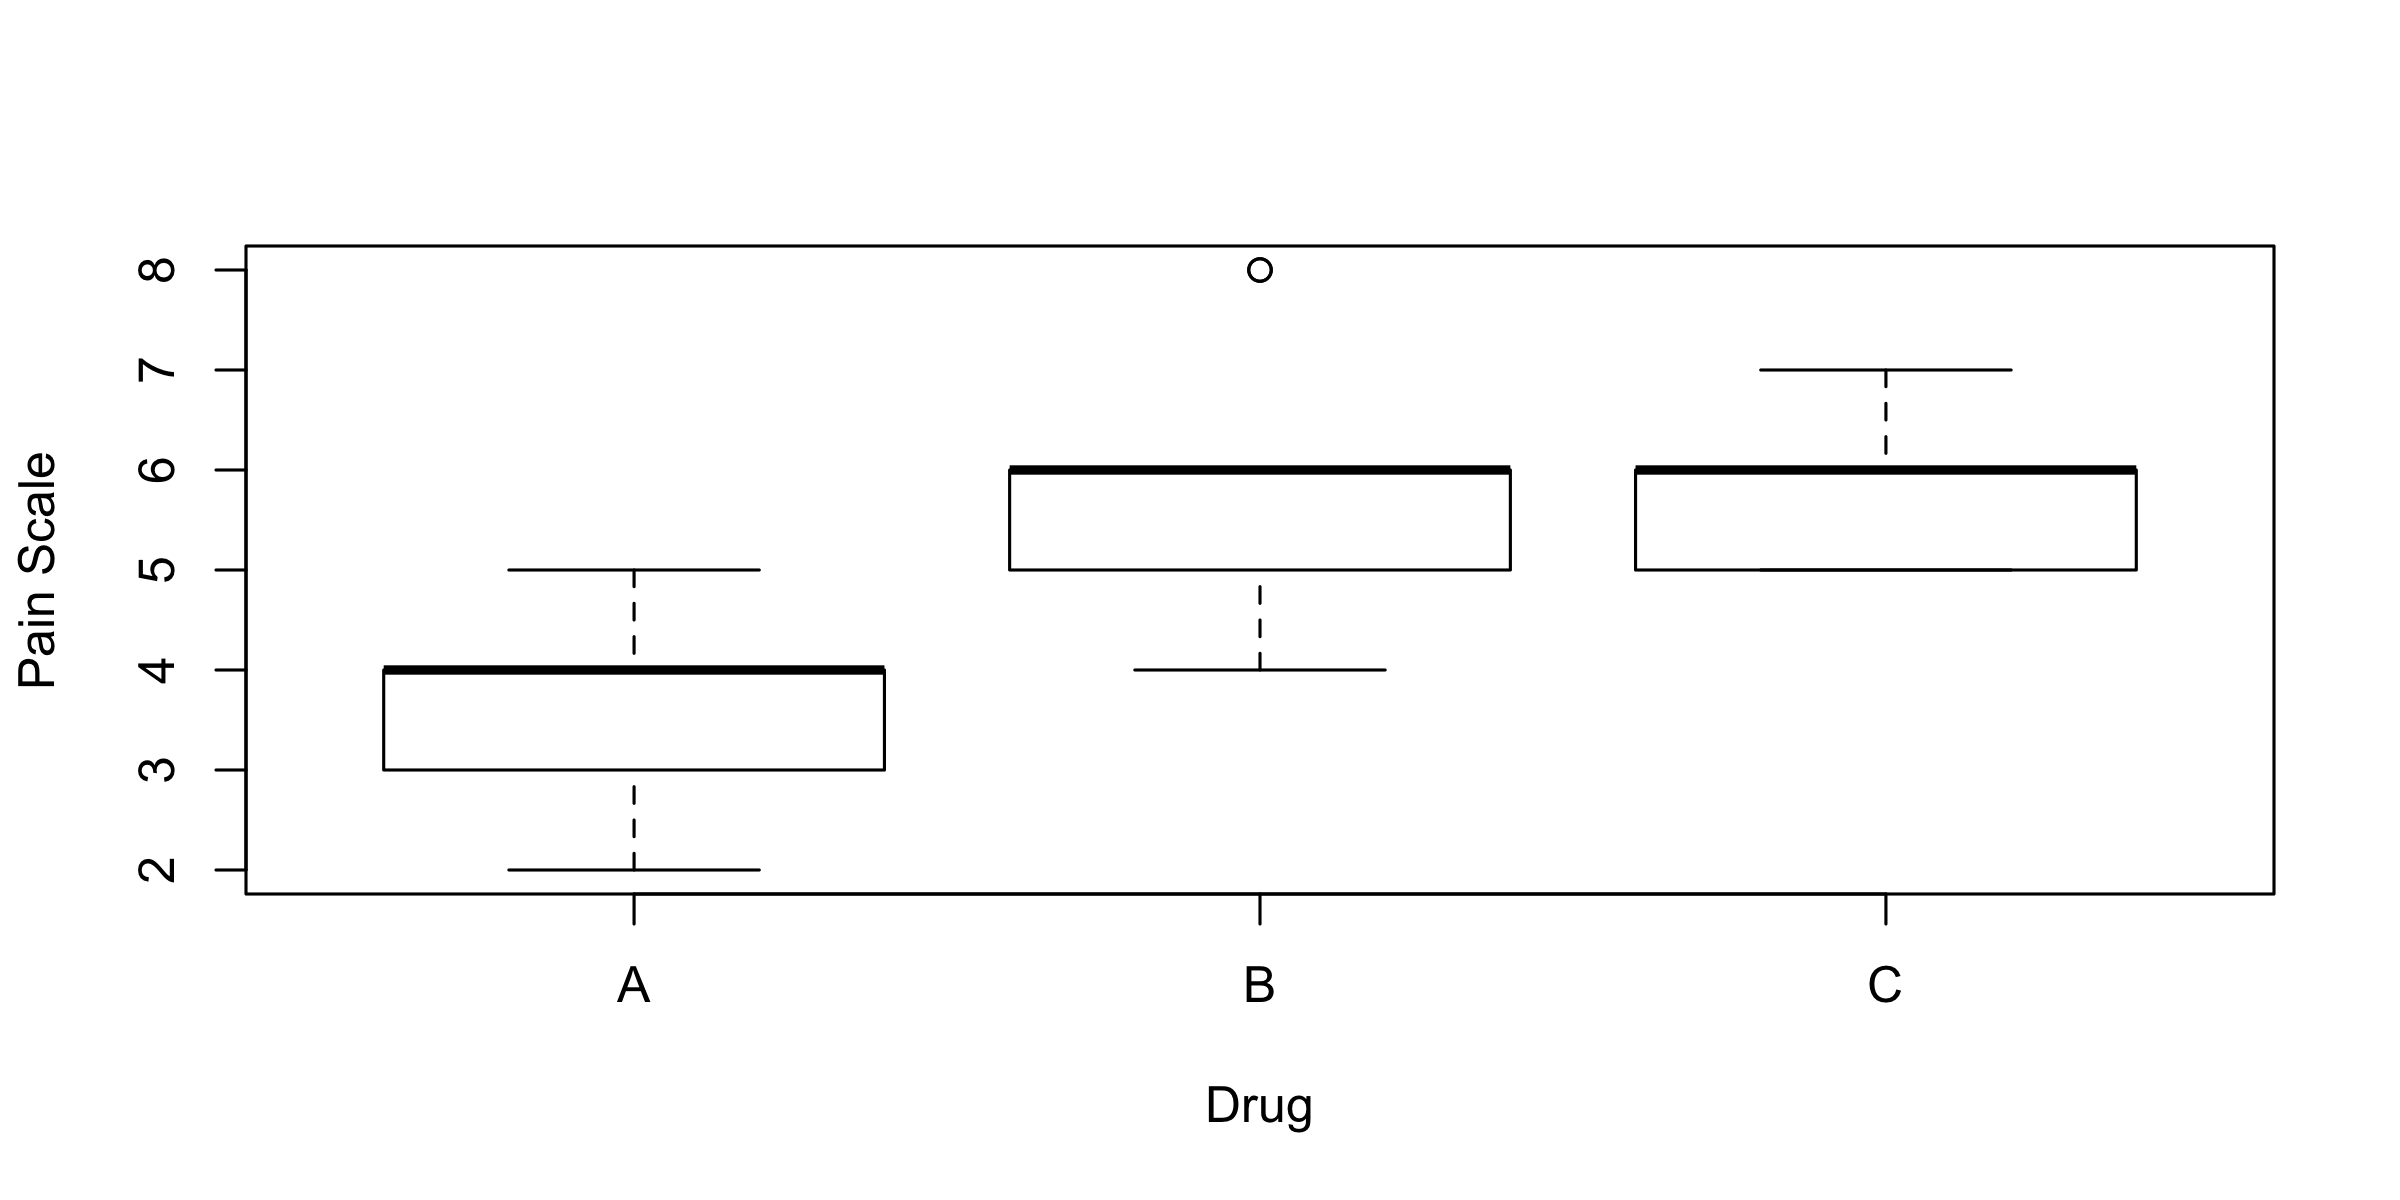

In [24]:
boxplot(drugA, drugB, drugC, names=c("A", "B", "C"), xlab="Drug", ylab="Pain Scale")

By eye it certainly looks like A is better at controling pain than B or C, but how sure are we?

Let's check our conditions to use an ANOVA model:
 1.  Independance - this is something we have to assume, probably ok given that the subjects are randomly assigned to a group.
 2. Normality? We'll let's try making some plots and taking a look:

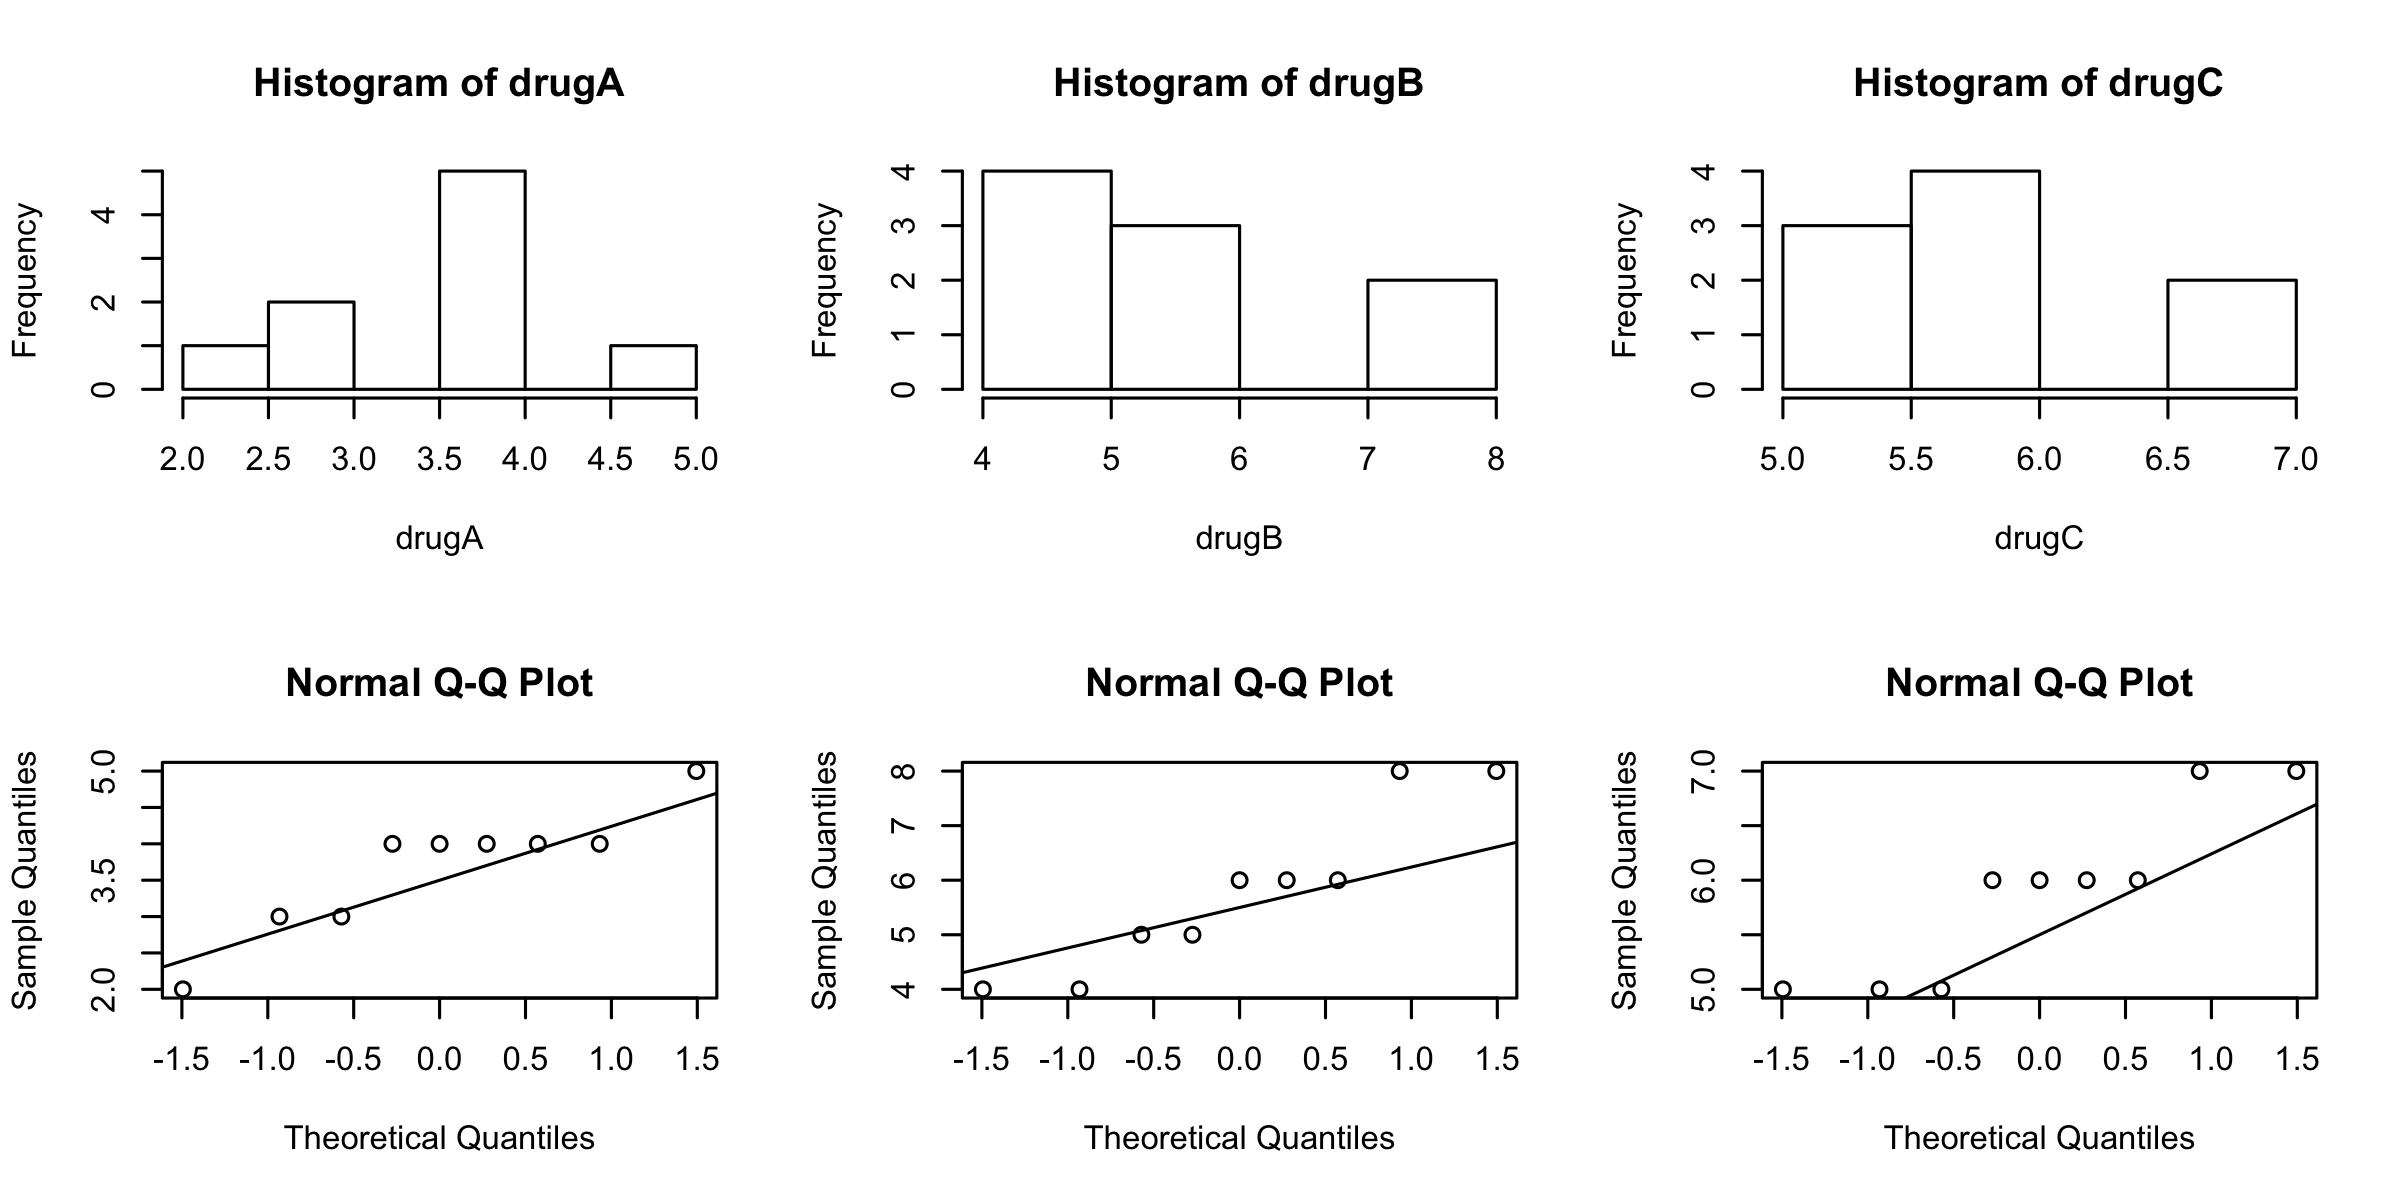

In [25]:
par(mfrow=c(2,3)) # for each drug - histograms and QQ-plots
# (i) hists
hist(drugA)
hist(drugB)
hist(drugC)
# (ii) qq plots
# drugA
qqnorm(drugA)
qqline(drugA)
# drugB
qqnorm(drugB)
qqline(drugB)
# drugC
qqnorm(drugC)
qqline(drugC)

With such small numbers, its hard to really tell how normal these samples are, but they all look "OK", (maybe B less so), so we'll assume they are normally distributed going forward.  Again, this is a judgement call on our parts at this point.

  3. similar variences?

In [26]:
print(var(drugA))
print(var(drugB))
print(var(drugC))

[1] 0.75
[1] 2.194444
[1] 0.6111111


Again - these are a bit different, but, they all are within a factor of 4 of eachother. So, again, another judgement call, but lets assume the variences are about == for this problem & carry on.

To continue on further, we need to move around our data a bit:

In [27]:
pain = c(drugA,drugB,drugC) # concatinate all together
drug = c(rep("A",9), rep("B",9), rep("C",9)) # just some fancy labeling
print(pain)
print(drug)

 [1] 4 5 4 3 2 4 3 4 4 6 8 4 5 4 6 5 8 6 6 7 6 6 7 5 6 5 5
 [1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "C"
[20] "C" "C" "C" "C" "C" "C" "C" "C"


We'll smoosh these together as a dataframe (like a pandas dataframe if you like Python!)

In [28]:
migraine = data.frame(pain,drug)

In [29]:
head(migraine)

,pain,drug
,<dbl>,<fct>
1,4,A
2,5,A
3,4,A
4,3,A
5,2,A
6,4,A


Now, if we remember back to some of our R exercises at the beginning of class:
  * aov(response ~ factor, data=data_name)

Where here "response" responds to a "factor" i.e. the response is pain and the factor is the drug in our example.

In [30]:
aov_results = aov(pain ~ drug, data=migraine)

In [31]:
aov_results

Call:
   aov(formula = pain ~ drug, data = migraine)

Terms:
                    drug Residuals
Sum of Squares  28.22222  28.44444
Deg. of Freedom        2        24

Residual standard error: 1.088662
Estimated effects may be unbalanced

or for more info:

In [32]:
summary(aov_results)

            Df Sum Sq Mean Sq F value   Pr(>F)    
drug         2  28.22  14.111   11.91 0.000256 ***
Residuals   24  28.44   1.185                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

NOTE: there are many ways to do this test, we are doing the defaults

What we really want to pay attention to here is the F-value = (variability between groups)/(var in groups) and the p-value which, again, is just the area under the F-distribution which tells us something about how a-typical the difference in the means are.

Because p-value ~ 0.0003 << 0.05, our usual level of significance, we say we can reject the null hypothesis & there is a difference in the means.

## 2. TO SLIDES FOR BONFERRI CORRECTION

## 3. Pairwise t-tests with Bonfferoni correction

To do this with our current drug trial example, let's do it with a pairwise t-test, so like the t-tests we've done before, but it will calculate this on pairs

```r
pairwise.t.test(response, factor, 
                 p.adjust = method, 
                 alternative = c("two.sided", "less", "greater"))
```

Here, we don't know which drug is better at pain management, so let's assume two sided $\rightarrow$ the default

In [33]:
pairwise.t.test(pain, drug, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  pain and drug 

  A       B      
B 0.00119 -      
C 0.00068 1.00000

P value adjustment method: bonferroni 

What does this table tell us?

We see that the means are not significantly different between drugs B & C (p-value=1).  But both are significantly different from drug A $\rightarrow$ so the mean pain level is significantly different for Drug A.

If we had reason to expect drug A to have lower measurements we could test with:

In [34]:
pairwise.t.test(pain, drug, p.adjust="bonferroni", alternative="greater")


	Pairwise comparisons using t tests with pooled SD 

data:  pain and drug 

  A       B      
B 0.00059 -      
C 0.00034 1.00000

P value adjustment method: bonferroni 

But this gets into "data digging" territory!

### In person class, in groups:

Start by reading in data:

In [35]:
diet = read.csv("diet.csv",row.names=1) # header is at the top

In [36]:
head(diet)

,gender,age,height,diet.type,initial.weight,final.weight
,<fct>,<int>,<int>,<fct>,<int>,<dbl>
1,Female,22,159,A,58,54.2
2,Female,46,192,A,60,54.0
3,Female,55,170,A,64,63.3
4,Female,33,171,A,64,61.1
5,Female,50,170,A,65,62.2
6,Female,50,201,A,66,64.0


Define a weight loss parameter:

In [37]:
diet$weight.loss = diet$initial.weight - diet$final.weight 

In [38]:
head(diet)

,gender,age,height,diet.type,initial.weight,final.weight,weight.loss
,<fct>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>
1,Female,22,159,A,58,54.2,3.8
2,Female,46,192,A,60,54.0,6.0
3,Female,55,170,A,64,63.3,0.7
4,Female,33,171,A,64,61.1,2.9
5,Female,50,170,A,65,62.2,2.8
6,Female,50,201,A,66,64.0,2.0


**Q1:** plot a boxplot and give first impressions

**Q2:** is there a difference in the means between groups?

Note: you might get an "unbalanced error" - we'll ignore this for now.

**Q3:** which diet is better at weight change?

            Df Sum Sq Mean Sq F value Pr(>F)   
diet.type    2   60.5  30.264   5.383 0.0066 **
Residuals   73  410.4   5.622                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Pairwise comparisons using t tests with pooled SD 

data:  diet$weight.loss and diet$diet.type 

  A     B    
B 1.000 -    
C 0.021 0.017

P value adjustment method: bonferroni 


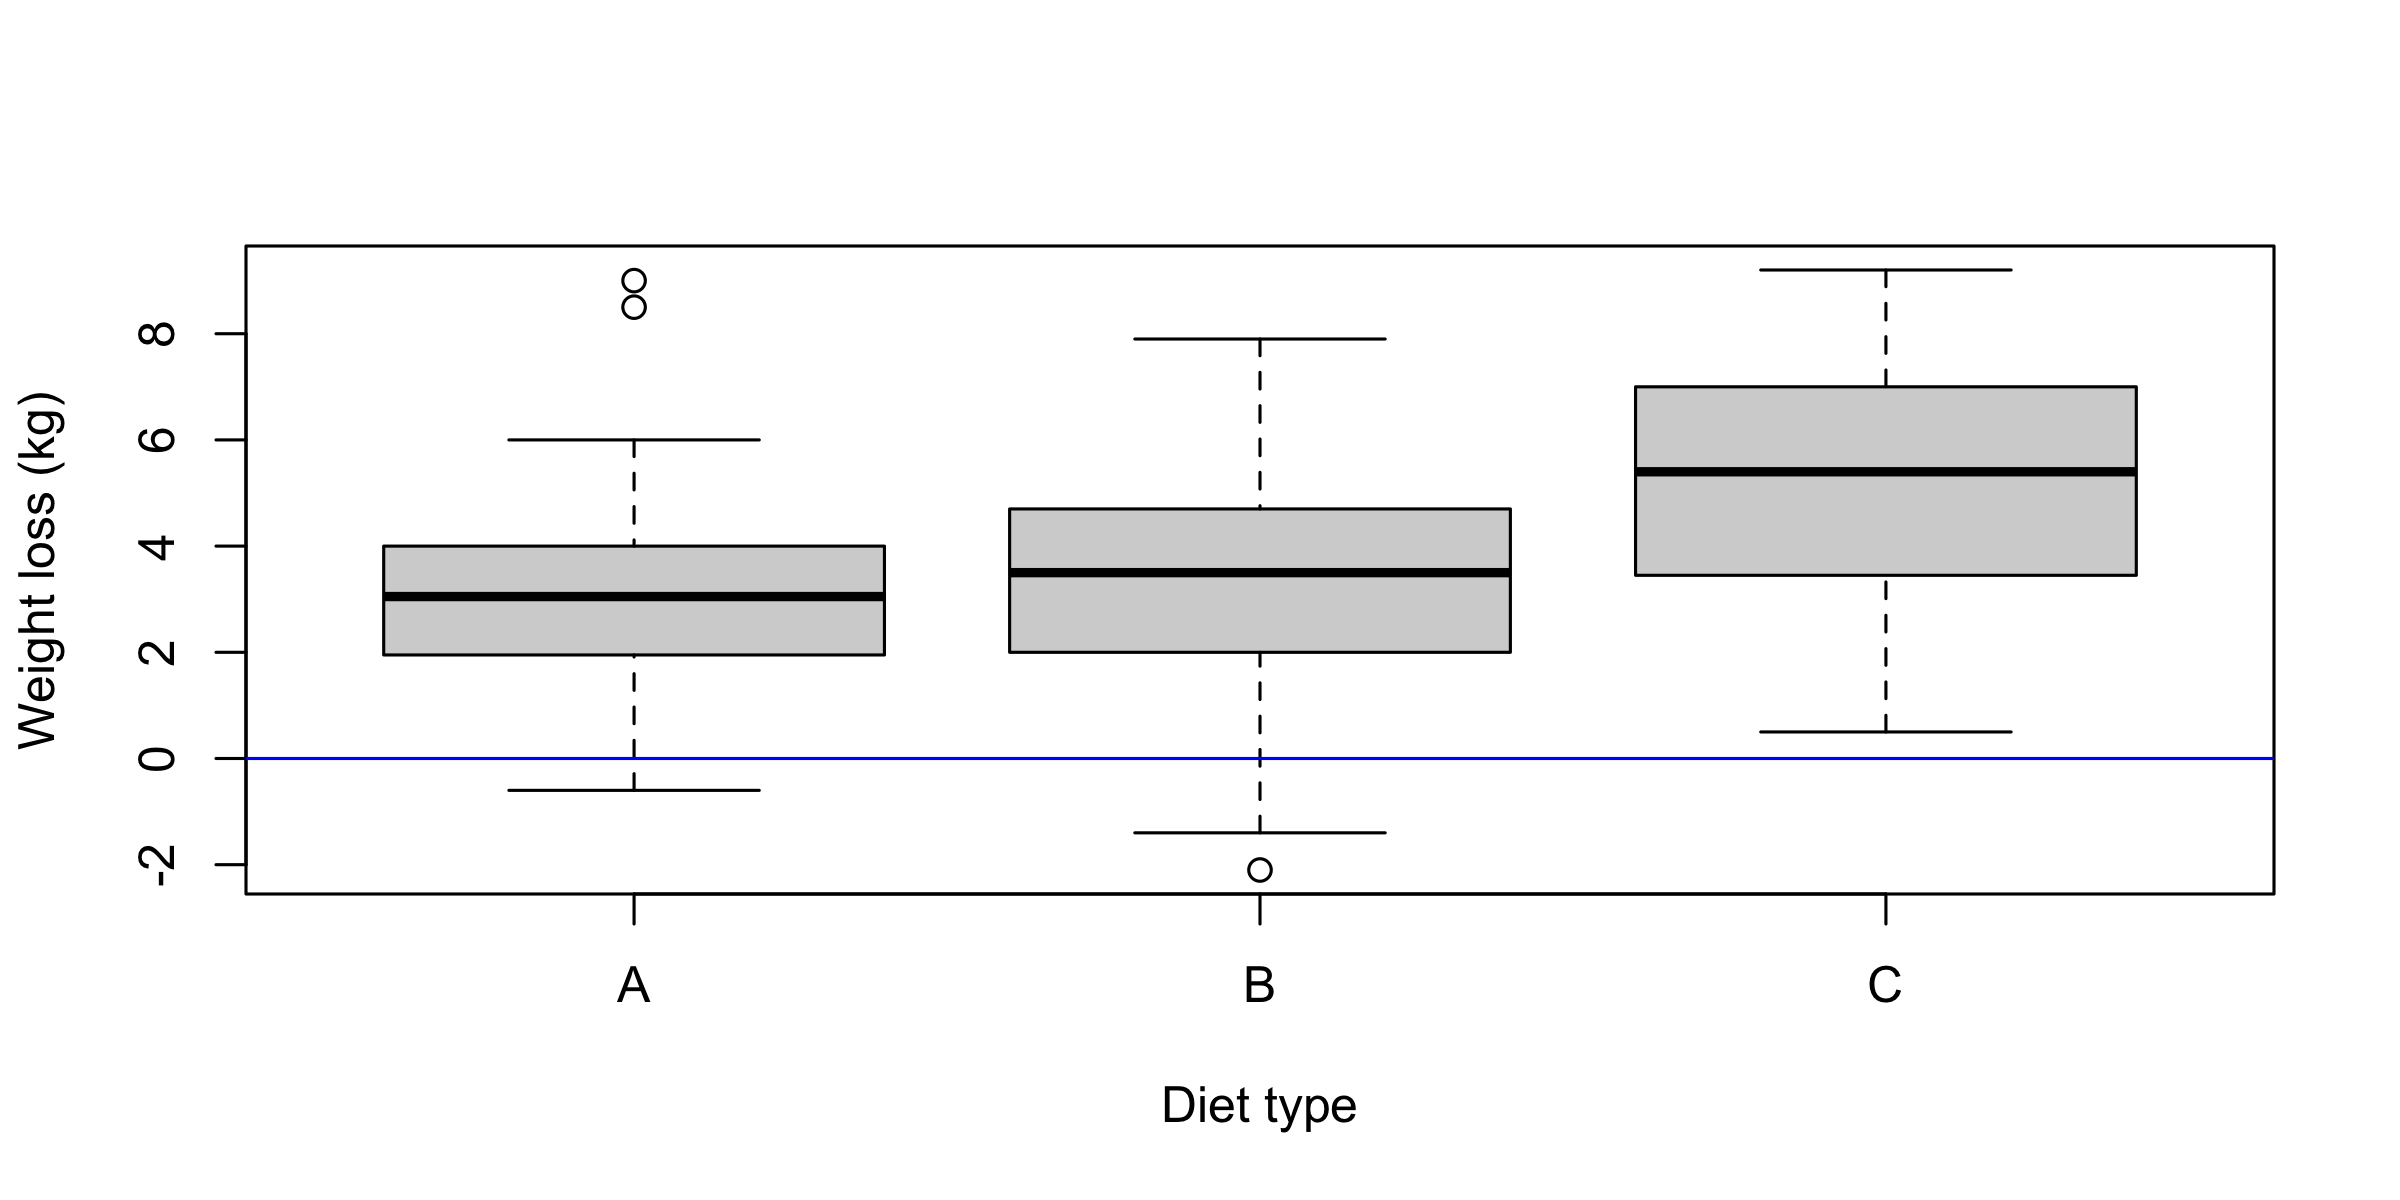

In [39]:
# ANS1:
boxplot(weight.loss~diet.type,data=diet,col="light gray",
        ylab = "Weight loss (kg)", xlab = "Diet type")
abline(h=0,col="blue") # weight loss = 0 line
# ANS2:
aov_results = aov(weight.loss ~ diet.type, data=diet)
summary(aov_results) # From our F & p-value looks like there is a difference!
# ANS3:
print(pairwise.t.test(diet$weight.loss, diet$diet.type, p.adjust="bonferroni"))
# Here B & A are the same, but C is different then both with pvalue < 0.05 level of significance
